In [1]:
from geopandas import GeoDataFrame
import _pickle as cPickle
from shapely.geometry import Polygon, mapping
from shapely.geometry import Point 
import geopandas as gpd
import fiona
import pandas as pd
import geopandas as gpd
import numpy as np
import folium as fo
import shapely as sh
import unicodedata as uco
import pysal as ps
from shapely.geometry import Point
from math import sin,cos,atan,acos,asin,atan2,sqrt,pi, modf
fiona.supported_drivers;
%matplotlib inline

In [2]:
kvartali = gpd.read_file('C:/Users/gery/Desktop/Hackathon/Naselenie_kvartali/Naselenie_kvartali.shp')
kvartali = kvartali.to_crs({'init': 'epsg:4326'})
kvartali['centroid'] = kvartali['geometry'].centroid

In [3]:
subway_stops = gpd.read_file('E:/Hackathon/Subway/Subway_stops/Subway_stops.shp')
subway_stops = subway_stops.to_crs({'init': 'epsg:4326'})


In [4]:
subway_stops.tail()

,Id,Sub_stop,Passengers,geometry
30,0,Александър Малинов,4277,POINT (23.37678759839688 42.64790650025313)
31,0,Александър Теодоров Балан,5931,POINT (23.37301950000165 42.64133970000001)
32,0,Бизнес парк,8934,POINT (23.37320720000166 42.62870430000001)
33,0,Ломско шосе,1559,POINT (23.28729640000126 42.7404865)
34,0,Сердика 2,11815,POINT (23.32193270000145 42.698365)


In [6]:
earthradius = 6371.0

def to_rad(x):
    return x*pi/180

def getDistanceByHaversine(point1, point2):
    "Haversine formula - give coordinates as (lat_decimal,lon_decimal) tuples"

    lat1, lon1 = point1.x,  point1.y
    lat2, lon2 = point2.x, point2.y
    # convert to radians
    lon1 = lon1 * pi / 180.0
    lon2 = lon2 * pi / 180.0
    lat1 = lat1 * pi / 180.0
    lat2 = lat2 * pi / 180.0

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = (sin(dlat/2))**2 + cos(lat1) * cos(lat2) * (sin(dlon/2.0))**2
    c = 2.0 * atan2(sqrt(a), sqrt(1.0-a))
    km = earthradius * c
    return km

In [14]:
def get_distance(point1, point2):
    return ((point1.x - point2.x)**2 + (point1.x - point2.x)**2)**.5

def nearest_subway_stop_distance(centroid):
    subway_distances = [getDistanceByHaversine(centroid, subway_stop) for subway_stop in subway_stops.geometry]
    return  min(subway_distances)

def nearest_subway_stop_name(centroid):
    return 3


kvartali['subway_distance'] = kvartali.centroid.apply(nearest_subway_stop_distance)
kvartali['log_subway_distance'] = kvartali.subway_distance.apply(np.log)
kvartali['walking_time_to_subway_station']= kvartali['subway_distance']/4

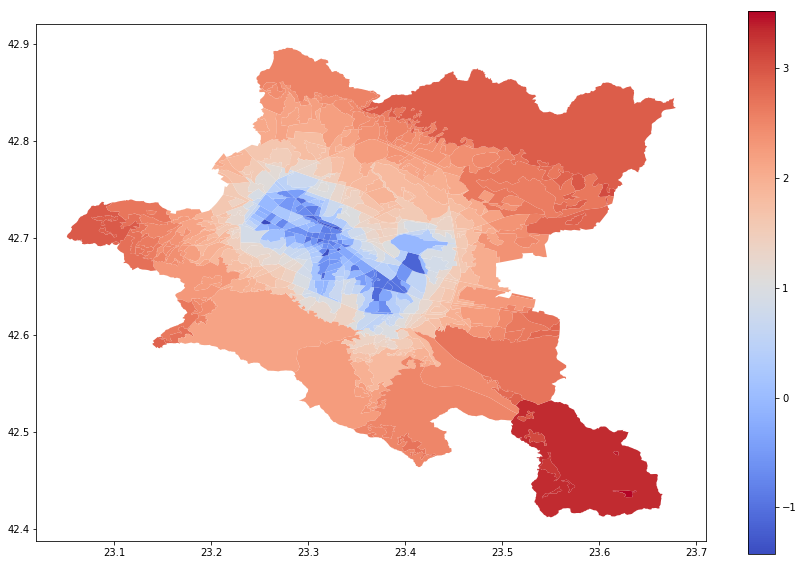

In [11]:
subway_distance_plot = kvartali.plot(column= 'log_subway_distance', cmap='coolwarm', legend=True,figsize=(15, 10));


In [15]:
kvartali[kvartali.RegName.str.contains('Витоша')]

,RegName,Rajon,NSettlemen,Broi_Lica,Broi_Jil,Male,Female,Age0_14,Age15_24,Age25_34,...,Educ4,Educ5,Area_m2,X,Y,geometry,centroid,subway_distance,log_subway_distance,walking_time_to_subway_station
100,Планина Витоша - р-н Витоша,Витоша,С.ВЛАДАЯ,20,18,10,10,6,0,4,...,0,0,7.685533e+07,684902.694225,4.719647e+06,"POLYGON ((23.21997524252973 42.64625962360164,...",POINT (23.25414848618221 42.60708983072102),8.684585,2.161550,2.171146
107,кв. Витоша - Лозенец,Лозенец,ГР.СОФИЯ,4132,4164,2071,2061,742,495,1149,...,126,337,1.877846e+06,691001.543299,4.724086e+06,"POLYGON ((23.32169115358851 42.64315629963599,...",POINT (23.32993507044937 42.64554419675957),1.997420,0.691856,0.499355
108,м. Витоша - ВЕЦ Симеоново,Студентска,ГР.СОФИЯ,2981,2132,1461,1520,516,431,787,...,153,280,4.858359e+05,691623.927940,4.724775e+06,"POLYGON ((23.3375390298562 42.64323135657886, ...",POINT (23.33775347666142 42.65158993326796),2.467176,0.903074,0.616794
481,Планина Витоша - р-н Панчарево,Панчарево,С.ЖЕЛЕЗНИЦА,1,1,0,1,0,0,0,...,0,0,4.295146e+07,691025.800123,4.713493e+06,"POLYGON ((23.34293345935129 42.58649208444547,...",POINT (23.32667335350807 42.55022540702926),9.537406,2.255221,2.384351


In [37]:
kvartali.to_csv("C:/Users/gery/Desktop/Hackathon/kvartali_subway_distance.csv") 
